In [119]:
#Importowanie potrzebnych bibilotek
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Zmienne w zbiorze danych:

1. letter	capital letter	(26 values from A to Z)
2. x-box	horizontal position of box	(integer)
3. y-box	vertical position of box	(integer)
4. width	width of box			(integer)
5. high 	height of box			(integer)
6. onpix	total # on pixels		(integer)
7. x-bar	mean x of on pixels in box	(integer)
9. y-bar	mean y of on pixels in box	(integer)
9. x2bar	mean x variance			(integer)
10. y2bar	mean y variance			(integer)
11. xybar	mean x y correlation		(integer)
12. x2ybr	mean of x * x * y		(integer)
13. xy2br	mean of x * y * y		(integer)
14. x-edge	mean edge count left to right	(integer)
16. xegvy	correlation of x-ege with y	(integer)
16. y-edge	mean edge count bottom to top	(integer)
17. yegvx	correlation of y-ege with x	(integer)**

# Wczytywanie danych

In [141]:
#defniowanie nazw kolumn dla danych
colnames = ['letter','x-box','y-box','width','height','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-edge','xegvy','y-edge',' yegvx']
data = pd.read_csv("letter-recognition.data", names = colnames)
data.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-edge,xegvy,y-edge,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


# Wykres czestości każdej z klas ze zmiennej docelowej

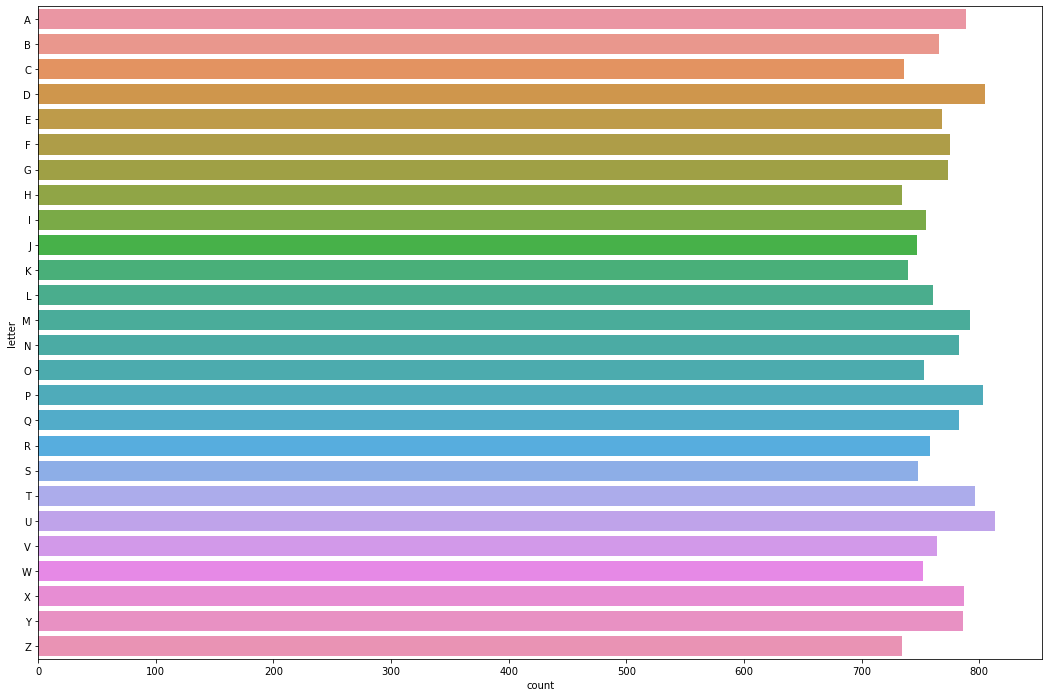

In [142]:
#Frequency of target variable categories
plt.figure(figsize=(18,12))
sns.barplot(data=data.groupby(['letter'])['letter'].count().reset_index(name="count"), x="count", y="letter")
plt.show()

# Normalizacja danych

In [143]:
data[['x-box','y-box','width','height','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-edge','xegvy','y-edge',' yegvx']] = MinMaxScaler().fit_transform(data[['x-box','y-box','width','height','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-edge','xegvy','y-edge',' yegvx']])
le = LabelEncoder()
data['letter'] = le.fit_transform(data['letter'])
data.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-edge,xegvy,y-edge,yegvx
0,19,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,8,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,3,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,13,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,6,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667


# Obliczanie wartości Mutual Information względem atrybutu decyzyjnego

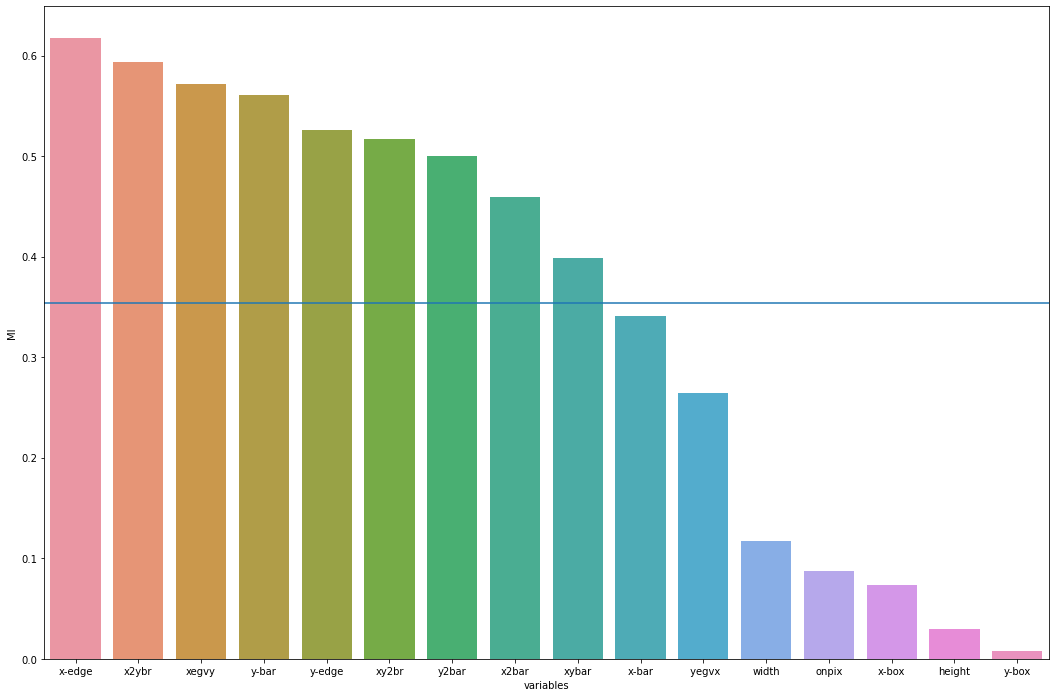

In [144]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

y = data['letter']
#
X = data[['x-box','y-box','width','height','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-edge','xegvy','y-edge',' yegvx']]


mi_scores = mutual_info_classif(X, y)
mi_scores = pd.DataFrame(zip(X,mi_scores), columns = ['variables','MI'])
mi_scores = mi_scores.sort_values(ascending=False, by = 'MI') 
plt.figure(figsize=(18,12))
sns.barplot(data=mi_scores, x='variables', y='MI')
plt.axhline(mi_scores['MI'].mean())
plt.show()   

# Analiza korelacji predyktorów

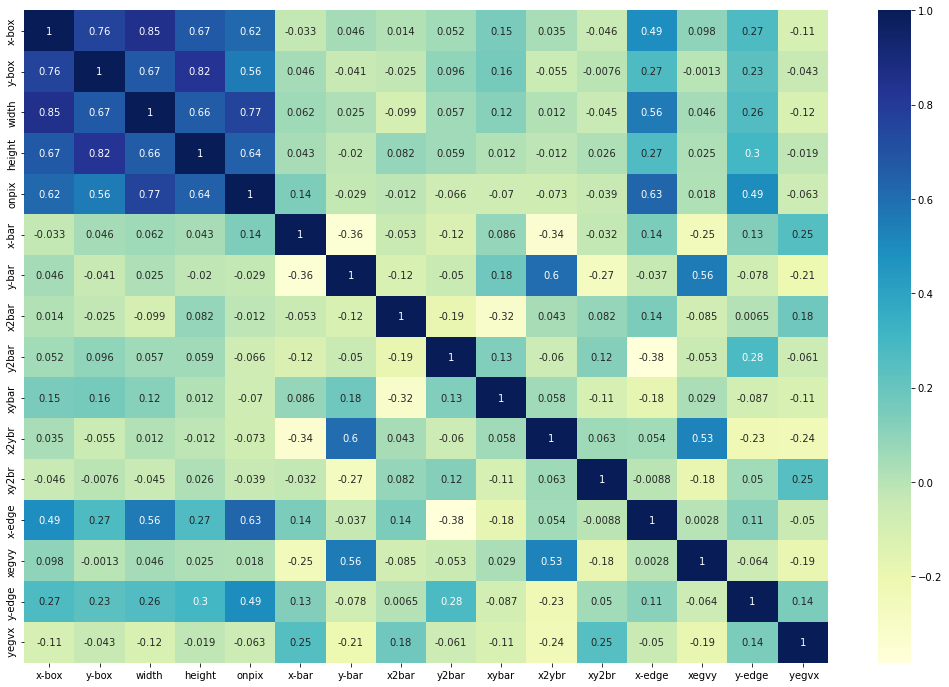

In [145]:
plt.figure(figsize=(18,12))
#usuwanie atrybuty decyzyjnego "letter" - jest to zmienna kategoryczna nie nadaje sie do analizy korelacji metoda r-pearsona
sns.heatmap(data.loc[:, data.columns!='letter'].corr(), cmap="YlGnBu", annot=True)
plt.show()

# Przygotowywanie docelowego zbioru danych

In [146]:
y = data[['letter']]
#usuwanie zmiennych width,height,x-box,y-box ze zbioru 
X = data[['onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-edge','xegvy','y-edge',' yegvx']]

#tworzenie zbioru walidacyjnego
X, X_val, y, y_val = train_test_split(X, y, stratify=y,test_size=0.1, random_state=12)



# Model Sieci Neuronowej
## 1. Defniowanie parametrów modelu

In [147]:
#Funkcje aktywacji
activations = ['relu','tanh','sigmoid']
#Optimizatory
optimizers = ['SGD','Adam']
#Stale uczenia
learning_rate = [0.01,0.05,0.001,0.005]
#Warstwy ukryte
hidden_layers =  [1,2,3]
#Ilosc neuronow w warstwie
neurons_per_layer = [16,18,20,22,24,26]

## 2. Definiowanie przestrzeni parametrów celem automatycznego przeszukiwania
Przy testowaniu kodu prosze pamiętać, że przeszukanie tej przestrzeni może zając bardzo długo (ponad 2 godziny) - kod jest wykomentowany, żeby nie uruchomić go przypadkiem. Tę część można pominiąć i przejść do własciwego trenowania i testowania modeli.

In [50]:
# #funkcja pomocnicza budowania modeli
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# #define model
# def build_model(hp):
#   model = Sequential()
#   activation_func = hp.Choice("activation", activations)
#   weights_strategy = "HeNormal" if hp.get("activation") == "relu" else "GlorotUniform"
   

#   for i in range(hp.Choice('hidden_layers', hidden_layers)):
#         if i == 0:
#             model.add(
#                 Dense( input_shape=(12,),units=hp.Choice('units',neurons_per_layer), 
#                 activation=activation_func,
#                 kernel_initializer=weights_strategy     )
                
#             )
#         else:
#             model.add(
#                 Dense(units=hp.Choice('units',neurons_per_layer), 
#                 activation=activation_func,
#                 kernel_initializer=weights_strategy)
                
#             )

#   model.add(Dense(units=26, activation="softmax",  kernel_initializer = "GlorotUniform"))
#   opti =  tf.keras.optimizers.SGD(learning_rate=hp.Choice("learning_rate", learning_rate)) if hp.Choice('optimizer', optimizers) == "SGD"  else tf.keras.optimizers.Adam(learning_rate=hp.Choice("learning_rate", learning_rate))
#   model.compile(optimizer= opti , loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy","sparse_categorical_accuracy"] )
#   return model

In [ ]:
# #Tworzenie obiektu przeszukującego przestrzeń parametrów
# #!pip install keras-tuner --upgrade
# import keras_tuner
# tuner = keras_tuner.RandomSearch(
#     hypermodel=build_model,
#     objective="val_accuracy",
#     max_trials=300,
#     executions_per_trial=1,
#     overwrite=True,
#     seed=12
# )
# tuner.search_space_summary()

In [126]:
#Przeszukiwanie
#tuner.search(X_train, y_train, validation_data=(X_val, y_val),epochs=250, callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=8, restore_best_weights=True)])

In [ ]:
# #Odczyt najlepszych modeli
# tuner.results_summary()
# best_hps=tuner.get_best_hyperparameters(25)
# models = tuner.get_best_models(num_models=15)
# #best_model =  tuner.hypermodel.build(best_hps)
# #best_model.save("my_h5_model.h5")
# print(best_model.summary())
# config = best_model.get_config()
# for b in best_hps:
#     print(b.values)

##  3. Trenowanie i testowanie modelu

In [148]:
#Funkcja pomocnicza zwracająca model na podstawie hiperparametrów
def build_modelz(layers,units, activation,optimizer,learning_rate):
  weights_strategy = "HeNormal" if activation == "relu" else "GlorotUniform"  
  model = Sequential()
  for i in range(layers):
        if i == 0:
            model.add(
                Dense( input_shape=(12,),units=units, 
                activation=activation,
                      kernel_initializer=weights_strategy)
            )
        else:
            model.add(
                Dense(units=units, 
                activation=activation,
                      kernel_initializer=weights_strategy)
            )

  model.add(Dense(units=26, activation="softmax",kernel_initializer = "GlorotUniform"))
  opti =  tf.keras.optimizers.SGD(learning_rate=learning_rate) if optimizer == "SGD"  else tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer= opti , loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy",] )
  return model

In [149]:
#modele wytypowane do przetestowania na podstawie przeszukania przestrzeni hiperparametrów
models_comparison = [
[3,26,"sigmoid","adam",0.01],
[3,24,"tanh","adam",0.005],
[3,24,"tanh", "adam",0.001],
[2,26,"sigmoid","adam",0.05],
[3,22,"tanh","SGD",0.05],
[3,24,"relu","adam",0.001],    
[1,26,"tanh","adam",0.01],
[2,26,"relu","adam",0.001]
]
                        
model_data = []                   

#Definiowanie zbiorów walidacji krzyżowej
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

#Testowanie modelów za pomocą walidacji krzyżowej - testowanie 8 modeli w 5-krotnej walidacji może potrwać pomiędzy 15 a 30 minut.
# 8 modeli * 5-krotna walidajca = 40 modeli
for m in models_comparison:
    accuracies = []
    for train_index, test_index in skf.split(X, y):
        model = build_modelz(*m)
        model.fit(X.iloc[train_index], y.iloc[train_index], epochs=250, batch_size=64,verbose=1, callbacks=tf.keras.callbacks.EarlyStopping('loss', patience=8, restore_best_weights=True))
        results = model.evaluate(X.iloc[test_index], y.iloc[test_index], batch_size=64)
        accuracies.append(results[1])
        print("test loss, test acc:", results)
    model_data.append(m + accuracies)
    
model_data = pd.DataFrame(model_data)
model_data.columns =['Layers','Units','Activation','Optimizer','Lr','Fold1','Fold2','Fold3','Fold4','Fold5']

Epoch 1/250
225/225 [==============================] - 2s 2ms/step - loss: 3.2166 - accuracy: 0.0560
Epoch 2/250
225/225 [==============================] - 0s 2ms/step - loss: 2.3016 - accuracy: 0.2885
Epoch 3/250
225/225 [==============================] - 0s 2ms/step - loss: 1.7933 - accuracy: 0.4330
Epoch 4/250
225/225 [==============================] - 0s 2ms/step - loss: 1.6143 - accuracy: 0.4896
Epoch 5/250
225/225 [==============================] - 0s 2ms/step - loss: 1.4783 - accuracy: 0.5353
Epoch 6/250
225/225 [==============================] - 0s 2ms/step - loss: 1.3800 - accuracy: 0.5663
Epoch 7/250
225/225 [==============================] - 0s 2ms/step - loss: 1.2898 - accuracy: 0.5955
Epoch 8/250
225/225 [==============================] - 0s 2ms/step - loss: 1.2080 - accuracy: 0.6271
Epoch 9/250
225/225 [==============================] - 0s 2ms/step - loss: 1.1452 - accuracy: 0.6442
Epoch 10/250
225/225 [==============================] - 0s 2ms/step - loss: 1.1034 - accura

225/225 [==============================] - 0s 1ms/step - loss: 0.3721 - accuracy: 0.8810
Epoch 82/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8774
Epoch 83/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.8821
Epoch 84/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8841
Epoch 85/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8834
Epoch 86/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8876
Epoch 87/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.8817
Epoch 88/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8874
Epoch 89/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8885
Epoch 90/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.9176
Epoch 161/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.9215
Epoch 162/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2367 - accuracy: 0.9244
Epoch 163/250
225/225 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.9203
Epoch 164/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2387 - accuracy: 0.9249
Epoch 165/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9246
Epoch 166/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2346 - accuracy: 0.9225
Epoch 167/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2458 - accuracy: 0.9203
Epoch 168/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2364 - accuracy: 0.9228
Epoch 169/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2366 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.7834
Epoch 27/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.7887
Epoch 28/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.7905
Epoch 29/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.7974
Epoch 30/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.8008
Epoch 31/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.8031
Epoch 32/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6015 - accuracy: 0.8091
Epoch 33/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5941 - accuracy: 0.8129
Epoch 34/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.8160
Epoch 35/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.9040
Epoch 107/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2885 - accuracy: 0.9043
Epoch 108/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.9081
Epoch 109/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.9095
Epoch 110/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.9039
Epoch 111/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.9076
Epoch 112/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2771 - accuracy: 0.9073
Epoch 113/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.9082
Epoch 114/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.9109
Epoch 115/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2736 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.7478 - accuracy: 0.7694
Epoch 27/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7259 - accuracy: 0.7739
Epoch 28/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7141 - accuracy: 0.7792
Epoch 29/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.7812
Epoch 30/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.7884
Epoch 31/250
225/225 [==============================] - 1s 2ms/step - loss: 0.6739 - accuracy: 0.7913
Epoch 32/250
225/225 [==============================] - 1s 4ms/step - loss: 0.6639 - accuracy: 0.7926
Epoch 33/250
225/225 [==============================] - 1s 3ms/step - loss: 0.6545 - accuracy: 0.7987
Epoch 34/250
225/225 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.8029
Epoch 35/250
225/225 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2870 - accuracy: 0.9090
Epoch 107/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.9107
Epoch 108/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 0.9105
Epoch 109/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2768 - accuracy: 0.9117
Epoch 110/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2798 - accuracy: 0.9096
Epoch 111/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2772 - accuracy: 0.9096
Epoch 112/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2771 - accuracy: 0.9137
Epoch 113/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.9147
Epoch 114/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2680 - accuracy: 0.9140
Epoch 115/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2741 - a

225/225 [==============================] - 0s 1ms/step - loss: 1.3485 - accuracy: 0.5751
Epoch 9/250
225/225 [==============================] - 0s 1ms/step - loss: 1.2829 - accuracy: 0.5958
Epoch 10/250
225/225 [==============================] - 0s 1ms/step - loss: 1.2197 - accuracy: 0.6181
Epoch 11/250
225/225 [==============================] - 0s 1ms/step - loss: 1.1632 - accuracy: 0.6372
Epoch 12/250
225/225 [==============================] - 0s 1ms/step - loss: 1.1161 - accuracy: 0.6524
Epoch 13/250
225/225 [==============================] - 0s 1ms/step - loss: 1.0642 - accuracy: 0.6693
Epoch 14/250
225/225 [==============================] - 0s 1ms/step - loss: 1.0113 - accuracy: 0.6823
Epoch 15/250
225/225 [==============================] - 0s 1ms/step - loss: 0.9721 - accuracy: 0.6942
Epoch 16/250
225/225 [==============================] - 0s 1ms/step - loss: 0.9400 - accuracy: 0.7026
Epoch 17/250
225/225 [==============================] - 0s 1ms/step - loss: 0.9116 - accuracy: 0

225/225 [==============================] - 0s 1ms/step - loss: 0.3728 - accuracy: 0.8818
Epoch 89/250
225/225 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8804
Epoch 90/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3705 - accuracy: 0.8824
Epoch 91/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8825
Epoch 92/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8847
Epoch 93/250
225/225 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8842
Epoch 94/250
225/225 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8888
Epoch 95/250
225/225 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8825
Epoch 96/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8890
Epoch 97/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.9201
Epoch 168/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.9157
Epoch 169/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2443 - accuracy: 0.9234
Epoch 170/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2402 - accuracy: 0.9210
Epoch 171/250
225/225 [==============================] - 1s 3ms/step - loss: 0.2440 - accuracy: 0.9190
Epoch 172/250
225/225 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9197
Epoch 173/250
225/225 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.9208
Epoch 174/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2431 - accuracy: 0.9183
Epoch 175/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2413 - accuracy: 0.9211
Epoch 176/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2424 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.8076
Epoch 29/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.8116
Epoch 30/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.8203
Epoch 31/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.8172
Epoch 32/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.8207
Epoch 33/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.8267
Epoch 34/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.8333
Epoch 35/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.8328
Epoch 36/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.8330
Epoch 37/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2661 - accuracy: 0.9133
Epoch 109/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2708 - accuracy: 0.9134
Epoch 110/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2745 - accuracy: 0.9119
Epoch 111/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.9117
Epoch 112/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2647 - accuracy: 0.9154
Epoch 113/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2608 - accuracy: 0.9178
Epoch 114/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2632 - accuracy: 0.9139
Epoch 115/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2616 - accuracy: 0.9162
Epoch 116/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2642 - accuracy: 0.9158
Epoch 117/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2556 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9357
Epoch 188/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2026 - accuracy: 0.9334
Epoch 189/250
225/225 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9351
Epoch 190/250
225/225 [==============================] - 0s 1ms/step - loss: 0.1999 - accuracy: 0.9332
Epoch 191/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2000 - accuracy: 0.9333
Epoch 192/250
225/225 [==============================] - 0s 1ms/step - loss: 0.1938 - accuracy: 0.9359
Epoch 193/250
225/225 [==============================] - 0s 1ms/step - loss: 0.1936 - accuracy: 0.9356
Epoch 194/250
57/57 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.9061
test loss, test acc: [0.33273041248321533, 0.9061111211776733]
Epoch 1/250
225/225 [==============================] - 1s 1ms/step - loss: 2.0150 - accuracy: 0.4083
Epoch 2/250
225/225 [=======

Epoch 72/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.8974
Epoch 73/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.8982
Epoch 74/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.9016
Epoch 75/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3148 - accuracy: 0.9000
Epoch 76/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3031 - accuracy: 0.9032
Epoch 77/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.9014
Epoch 78/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.9028
Epoch 79/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3026 - accuracy: 0.9058
Epoch 80/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.9076
Epoch 81/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2912

225/225 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8996
Epoch 62/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.9019
Epoch 63/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.9017
Epoch 64/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.8968
Epoch 65/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.9024
Epoch 66/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.9053
Epoch 67/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3024 - accuracy: 0.9027
Epoch 68/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.9031
Epoch 69/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 0.9026
Epoch 70/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.8219
Epoch 11/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5638 - accuracy: 0.8251
Epoch 12/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.8353
Epoch 13/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5350 - accuracy: 0.8332
Epoch 14/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.8392
Epoch 15/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.8453
Epoch 16/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.8481
Epoch 17/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.8533
Epoch 18/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.8527
Epoch 19/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2745 - accuracy: 0.9103
Epoch 91/250
225/225 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.9090
Epoch 92/250
57/57 [==============================] - 0s 947us/step - loss: 0.3739 - accuracy: 0.8869
test loss, test acc: [0.3738633990287781, 0.8869444727897644]
Epoch 1/250
225/225 [==============================] - 1s 1ms/step - loss: 2.0208 - accuracy: 0.4097
Epoch 2/250
225/225 [==============================] - 0s 1ms/step - loss: 1.2403 - accuracy: 0.6461
Epoch 3/250
225/225 [==============================] - 0s 1ms/step - loss: 1.0126 - accuracy: 0.7092
Epoch 4/250
225/225 [==============================] - 0s 1ms/step - loss: 0.8940 - accuracy: 0.7374
Epoch 5/250
225/225 [==============================] - 0s 1ms/step - loss: 0.8295 - accuracy: 0.7499
Epoch 6/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7579 - accuracy: 0.7742
Epoch 7/250
225/225 [==================

225/225 [==============================] - 0s 1ms/step - loss: 0.2872 - accuracy: 0.9087
Epoch 78/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2881 - accuracy: 0.9058
Epoch 79/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.9106
Epoch 80/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2857 - accuracy: 0.9085
Epoch 81/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.9084
Epoch 82/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2727 - accuracy: 0.9119
Epoch 83/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2788 - accuracy: 0.9092
Epoch 84/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2746 - accuracy: 0.9117
Epoch 85/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2700 - accuracy: 0.9117
Epoch 86/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 

Epoch 48/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8928
Epoch 49/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3360 - accuracy: 0.8955
Epoch 50/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8960
Epoch 51/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8942
Epoch 52/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.8948
Epoch 53/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8950
Epoch 54/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.8991
Epoch 55/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3238 - accuracy: 0.8966
Epoch 56/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8972
Epoch 57/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3187

57/57 [==============================] - 1s 947us/step - loss: 0.3757 - accuracy: 0.8889
test loss, test acc: [0.37572845816612244, 0.8888888955116272]
Epoch 1/250
225/225 [==============================] - 1s 1ms/step - loss: 2.9343 - accuracy: 0.1853
Epoch 2/250
225/225 [==============================] - 0s 1ms/step - loss: 2.0398 - accuracy: 0.4106
Epoch 3/250
225/225 [==============================] - 0s 1ms/step - loss: 1.6754 - accuracy: 0.5244
Epoch 4/250
225/225 [==============================] - 0s 1ms/step - loss: 1.4850 - accuracy: 0.5884
Epoch 5/250
225/225 [==============================] - 0s 1ms/step - loss: 1.3576 - accuracy: 0.6274
Epoch 6/250
225/225 [==============================] - 0s 1ms/step - loss: 1.2690 - accuracy: 0.6517
Epoch 7/250
225/225 [==============================] - 0s 1ms/step - loss: 1.2064 - accuracy: 0.6647
Epoch 8/250
225/225 [==============================] - 0s 1ms/step - loss: 1.1604 - accuracy: 0.6737
Epoch 9/250
225/225 [===================

225/225 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.8651
Epoch 80/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8633
Epoch 81/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8670
Epoch 82/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.8660
Epoch 83/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8672
Epoch 84/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8673
Epoch 85/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8689
Epoch 86/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8699
Epoch 87/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8710
Epoch 88/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.9001
Epoch 159/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.9000
Epoch 160/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.9008
Epoch 161/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8999
Epoch 162/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.9003
Epoch 163/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.9006
Epoch 164/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.9027
Epoch 165/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.9026
Epoch 166/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.9012
Epoch 167/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3242 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.9167
Epoch 238/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2719 - accuracy: 0.9152
Epoch 239/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2745 - accuracy: 0.9167
Epoch 240/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.9183
Epoch 241/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2734 - accuracy: 0.9174
Epoch 242/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.9169
Epoch 243/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.9171
Epoch 244/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.9171
Epoch 245/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.9182
Epoch 246/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2697 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.5061 - accuracy: 0.8468
Epoch 66/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5022 - accuracy: 0.8513
Epoch 67/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.8501
Epoch 68/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.8512
Epoch 69/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.8519
Epoch 70/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.8548
Epoch 71/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.8552
Epoch 72/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.8547
Epoch 73/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.8540
Epoch 74/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8901
Epoch 146/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8911
Epoch 147/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8903
Epoch 148/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8922
Epoch 149/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8924
Epoch 150/250
225/225 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8941
Epoch 151/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8950
Epoch 152/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8945
Epoch 153/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8933
Epoch 154/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3449 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.9092
Epoch 225/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.9098
Epoch 226/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2909 - accuracy: 0.9108
Epoch 227/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.9084
Epoch 228/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2893 - accuracy: 0.9111
Epoch 229/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.9123
Epoch 230/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2900 - accuracy: 0.9111
Epoch 231/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.9115
Epoch 232/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.9100
Epoch 233/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2865 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.5324 - accuracy: 0.8406
Epoch 53/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.8419
Epoch 54/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5232 - accuracy: 0.8435
Epoch 55/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.8437
Epoch 56/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.8457
Epoch 57/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.8463
Epoch 58/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.8467
Epoch 59/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.8483
Epoch 60/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.8492
Epoch 61/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8926
Epoch 133/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8931
Epoch 134/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8938
Epoch 135/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8921
Epoch 136/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8924
Epoch 137/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8937
Epoch 138/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8924
Epoch 139/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8936
Epoch 140/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8944
Epoch 141/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3512 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.2964 - accuracy: 0.9086
Epoch 212/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2940 - accuracy: 0.9107
Epoch 213/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9088
Epoch 214/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2934 - accuracy: 0.9099
Epoch 215/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2937 - accuracy: 0.9090
Epoch 216/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2945 - accuracy: 0.9104
Epoch 217/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.9097
Epoch 218/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.9119
Epoch 219/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2886 - accuracy: 0.9119
Epoch 220/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2889 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.8234
Epoch 40/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.8231
Epoch 41/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.8241
Epoch 42/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.8264
Epoch 43/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5834 - accuracy: 0.8303
Epoch 44/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.8295
Epoch 45/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.8310
Epoch 46/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.8360
Epoch 47/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5587 - accuracy: 0.8359
Epoch 48/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5558 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8883
Epoch 120/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8887
Epoch 121/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8891
Epoch 122/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8898
Epoch 123/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8903
Epoch 124/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8893
Epoch 125/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8901
Epoch 126/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8908
Epoch 127/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.8913
Epoch 128/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3518 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.9105
Epoch 199/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.9112
Epoch 200/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.9125
Epoch 201/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.9120
Epoch 202/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.9108
Epoch 203/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2823 - accuracy: 0.9118
Epoch 204/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2823 - accuracy: 0.9123
Epoch 205/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2812 - accuracy: 0.9121
Epoch 206/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.9135
Epoch 207/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2783 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.8002
Epoch 27/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.8031
Epoch 28/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.8060
Epoch 29/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.8080
Epoch 30/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6408 - accuracy: 0.8116
Epoch 31/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.8149
Epoch 32/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.8183
Epoch 33/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6132 - accuracy: 0.8184
Epoch 34/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.8233
Epoch 35/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8905
Epoch 107/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8903
Epoch 108/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8883
Epoch 109/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8913
Epoch 110/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.8911
Epoch 111/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8919
Epoch 112/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8924
Epoch 113/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8918
Epoch 114/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.8923
Epoch 115/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3493 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.2873 - accuracy: 0.9112
Epoch 186/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.9107
Epoch 187/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2854 - accuracy: 0.9117
Epoch 188/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2865 - accuracy: 0.9106
Epoch 189/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.9112
Epoch 190/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2844 - accuracy: 0.9124
Epoch 191/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2856 - accuracy: 0.9113
Epoch 192/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2834 - accuracy: 0.9140
Epoch 193/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.9120
Epoch 194/250
225/225 [==============================] - 0s 1ms/step - loss: 0.2823 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.8449
Epoch 14/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.8467
Epoch 15/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.8456
Epoch 16/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.8520
Epoch 17/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8577
Epoch 18/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8648
Epoch 19/250
225/225 [==============================] - 0s 996us/step - loss: 0.4278 - accuracy: 0.8649
Epoch 20/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8631
Epoch 21/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8706
Epoch 22/250
225/225 [==============================] - 0s 982us/step - loss: 0.4045 - accura

225/225 [==============================] - 0s 987us/step - loss: 0.6287 - accuracy: 0.7996
Epoch 14/250
225/225 [==============================] - 0s 969us/step - loss: 0.6128 - accuracy: 0.8047
Epoch 15/250
225/225 [==============================] - 0s 982us/step - loss: 0.5959 - accuracy: 0.8126
Epoch 16/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.8211
Epoch 17/250
225/225 [==============================] - 0s 982us/step - loss: 0.5557 - accuracy: 0.8249
Epoch 18/250
225/225 [==============================] - 0s 978us/step - loss: 0.5545 - accuracy: 0.8238
Epoch 19/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5459 - accuracy: 0.8298
Epoch 20/250
225/225 [==============================] - 0s 996us/step - loss: 0.5254 - accuracy: 0.8351
Epoch 21/250
225/225 [==============================] - 0s 978us/step - loss: 0.5160 - accuracy: 0.8387
Epoch 22/250
225/225 [==============================] - 0s 996us/step - loss: 0.5

225/225 [==============================] - 0s 991us/step - loss: 1.8378 - accuracy: 0.4244
Epoch 3/250
225/225 [==============================] - 0s 987us/step - loss: 1.2025 - accuracy: 0.6459
Epoch 4/250
225/225 [==============================] - 0s 982us/step - loss: 0.9785 - accuracy: 0.7065
Epoch 5/250
225/225 [==============================] - 0s 1ms/step - loss: 0.8541 - accuracy: 0.7371
Epoch 6/250
225/225 [==============================] - 0s 996us/step - loss: 0.7625 - accuracy: 0.7646
Epoch 7/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.7831
Epoch 8/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.7947
Epoch 9/250
225/225 [==============================] - 0s 991us/step - loss: 0.6191 - accuracy: 0.8054
Epoch 10/250
225/225 [==============================] - 0s 987us/step - loss: 0.5821 - accuracy: 0.8144
Epoch 11/250
225/225 [==============================] - 0s 991us/step - loss: 0.5447 - acc

225/225 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8559
Epoch 27/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8594
Epoch 28/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.8628
Epoch 29/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8604
Epoch 30/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8689
Epoch 31/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8585
Epoch 32/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8675
Epoch 33/250
225/225 [==============================] - 0s 996us/step - loss: 0.4119 - accuracy: 0.8702
Epoch 34/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8624
Epoch 35/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy

225/225 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.8871
Epoch 52/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8880
Epoch 53/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8874
Epoch 54/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8877
Epoch 55/250
225/225 [==============================] - 0s 982us/step - loss: 0.3449 - accuracy: 0.8867
Epoch 56/250
57/57 [==============================] - 0s 929us/step - loss: 0.4730 - accuracy: 0.8619
test loss, test acc: [0.47303423285484314, 0.8619444370269775]
Epoch 1/250
225/225 [==============================] - 1s 1ms/step - loss: 3.2002 - accuracy: 0.1176
Epoch 2/250
225/225 [==============================] - 0s 1ms/step - loss: 2.9106 - accuracy: 0.2774
Epoch 3/250
225/225 [==============================] - 0s 1ms/step - loss: 2.4197 - accuracy: 0.3340
Epoch 4/250
225/225 [============

225/225 [==============================] - 0s 982us/step - loss: 0.5692 - accuracy: 0.8322
Epoch 74/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.8316
Epoch 75/250
225/225 [==============================] - 0s 987us/step - loss: 0.5635 - accuracy: 0.8322
Epoch 76/250
225/225 [==============================] - 0s 996us/step - loss: 0.5617 - accuracy: 0.8342
Epoch 77/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.8350
Epoch 78/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5531 - accuracy: 0.8376
Epoch 79/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.8360
Epoch 80/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.8388
Epoch 81/250
225/225 [==============================] - 0s 982us/step - loss: 0.5406 - accuracy: 0.8384
Epoch 82/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5376 - ac

225/225 [==============================] - 0s 978us/step - loss: 0.3785 - accuracy: 0.8847
Epoch 153/250
225/225 [==============================] - 0s 951us/step - loss: 0.3793 - accuracy: 0.8866
Epoch 154/250
225/225 [==============================] - 0s 942us/step - loss: 0.3759 - accuracy: 0.8876
Epoch 155/250
225/225 [==============================] - 0s 964us/step - loss: 0.3740 - accuracy: 0.8879
Epoch 156/250
225/225 [==============================] - 0s 960us/step - loss: 0.3729 - accuracy: 0.8854
Epoch 157/250
225/225 [==============================] - 0s 947us/step - loss: 0.3731 - accuracy: 0.8877
Epoch 158/250
225/225 [==============================] - 0s 965us/step - loss: 0.3719 - accuracy: 0.8858
Epoch 159/250
225/225 [==============================] - 0s 960us/step - loss: 0.3717 - accuracy: 0.8893
Epoch 160/250
225/225 [==============================] - 0s 969us/step - loss: 0.3708 - accuracy: 0.8876
Epoch 161/250
225/225 [==============================] - 0s 965us/ste

225/225 [==============================] - 0s 961us/step - loss: 0.3067 - accuracy: 0.9044
Epoch 231/250
225/225 [==============================] - 0s 978us/step - loss: 0.3034 - accuracy: 0.9076
Epoch 232/250
225/225 [==============================] - 0s 978us/step - loss: 0.3040 - accuracy: 0.9067
Epoch 233/250
225/225 [==============================] - 0s 952us/step - loss: 0.3023 - accuracy: 0.9085
Epoch 234/250
225/225 [==============================] - 0s 956us/step - loss: 0.3017 - accuracy: 0.9067
Epoch 235/250
225/225 [==============================] - 0s 951us/step - loss: 0.3037 - accuracy: 0.9074
Epoch 236/250
225/225 [==============================] - 0s 956us/step - loss: 0.3020 - accuracy: 0.9065
Epoch 237/250
225/225 [==============================] - 0s 947us/step - loss: 0.3022 - accuracy: 0.9068
Epoch 238/250
225/225 [==============================] - 0s 951us/step - loss: 0.2991 - accuracy: 0.9080
Epoch 239/250
225/225 [==============================] - 0s 947us/ste

225/225 [==============================] - 0s 973us/step - loss: 0.6128 - accuracy: 0.8165
Epoch 59/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.8166
Epoch 60/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.8190
Epoch 61/250
225/225 [==============================] - 0s 996us/step - loss: 0.5930 - accuracy: 0.8185
Epoch 62/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.8228
Epoch 63/250
225/225 [==============================] - 0s 965us/step - loss: 0.5805 - accuracy: 0.8251
Epoch 64/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5759 - accuracy: 0.8276
Epoch 65/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.8263
Epoch 66/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5692 - accuracy: 0.8278
Epoch 67/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5609 - accu

225/225 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8819
Epoch 138/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3920 - accuracy: 0.8807
Epoch 139/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8829
Epoch 140/250
225/225 [==============================] - 0s 991us/step - loss: 0.3858 - accuracy: 0.8807
Epoch 141/250
225/225 [==============================] - 0s 996us/step - loss: 0.3878 - accuracy: 0.8815
Epoch 142/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3858 - accuracy: 0.8842
Epoch 143/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.8817
Epoch 144/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8799
Epoch 145/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.8810
Epoch 146/250
225/225 [==============================] - 0s 999us/step - loss: 0.38

225/225 [==============================] - 0s 1ms/step - loss: 0.3168 - accuracy: 0.9008
Epoch 216/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.9017
Epoch 217/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.9005
Epoch 218/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.9027
Epoch 219/250
225/225 [==============================] - 0s 969us/step - loss: 0.3138 - accuracy: 0.9007
Epoch 220/250
225/225 [==============================] - 0s 960us/step - loss: 0.3146 - accuracy: 0.9008
Epoch 221/250
225/225 [==============================] - 0s 973us/step - loss: 0.3143 - accuracy: 0.9035
Epoch 222/250
225/225 [==============================] - 0s 973us/step - loss: 0.3108 - accuracy: 0.9038
Epoch 223/250
225/225 [==============================] - 0s 969us/step - loss: 0.3089 - accuracy: 0.9033
Epoch 224/250
225/225 [==============================] - 0s 991us/step - loss

225/225 [==============================] - 0s 1ms/step - loss: 0.7822 - accuracy: 0.7760
Epoch 44/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7733 - accuracy: 0.7762
Epoch 45/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7641 - accuracy: 0.7792
Epoch 46/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7564 - accuracy: 0.7810
Epoch 47/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7473 - accuracy: 0.7835
Epoch 48/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7403 - accuracy: 0.7856
Epoch 49/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7362 - accuracy: 0.7865
Epoch 50/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7259 - accuracy: 0.7904
Epoch 51/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7166 - accuracy: 0.7942
Epoch 52/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7090 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.8692
Epoch 124/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8696
Epoch 125/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8709
Epoch 126/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8717
Epoch 127/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8722
Epoch 128/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8728
Epoch 129/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.8722
Epoch 130/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8767
Epoch 131/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8765
Epoch 132/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4232 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.9017
Epoch 203/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8990
Epoch 204/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.9007
Epoch 205/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.9014
Epoch 206/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.9010
Epoch 207/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.9009
Epoch 208/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.9006
Epoch 209/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.9009
Epoch 210/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.9019
Epoch 211/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3265 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.8515 - accuracy: 0.7505
Epoch 31/250
225/225 [==============================] - 0s 1ms/step - loss: 0.8422 - accuracy: 0.7515
Epoch 32/250
225/225 [==============================] - 0s 1ms/step - loss: 0.8250 - accuracy: 0.7558
Epoch 33/250
225/225 [==============================] - 0s 1ms/step - loss: 0.8142 - accuracy: 0.7612
Epoch 34/250
225/225 [==============================] - 0s 1ms/step - loss: 0.8067 - accuracy: 0.7599
Epoch 35/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7902 - accuracy: 0.7677
Epoch 36/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7814 - accuracy: 0.7712
Epoch 37/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7735 - accuracy: 0.7716
Epoch 38/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7632 - accuracy: 0.7733
Epoch 39/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7499 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8735
Epoch 111/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8731
Epoch 112/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8728
Epoch 113/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4168 - accuracy: 0.8737
Epoch 114/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8732
Epoch 115/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8760
Epoch 116/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8752
Epoch 117/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8744
Epoch 118/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8753
Epoch 119/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4070 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8984
Epoch 190/250
225/225 [==============================] - 0s 982us/step - loss: 0.3298 - accuracy: 0.9003
Epoch 191/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.9020
Epoch 192/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8982
Epoch 193/250
225/225 [==============================] - 0s 987us/step - loss: 0.3284 - accuracy: 0.9001
Epoch 194/250
225/225 [==============================] - 0s 991us/step - loss: 0.3246 - accuracy: 0.8999
Epoch 195/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 0.9019
Epoch 196/250
225/225 [==============================] - 0s 996us/step - loss: 0.3256 - accuracy: 0.9015
Epoch 197/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.9035
Epoch 198/250
225/225 [==============================] - 0s 978us/step - loss: 

225/225 [==============================] - 0s 1ms/step - loss: 1.1771 - accuracy: 0.6716
Epoch 17/250
225/225 [==============================] - 0s 1ms/step - loss: 1.1412 - accuracy: 0.6839
Epoch 18/250
225/225 [==============================] - 0s 1ms/step - loss: 1.1123 - accuracy: 0.6907
Epoch 19/250
225/225 [==============================] - 0s 1ms/step - loss: 1.0839 - accuracy: 0.6970
Epoch 20/250
225/225 [==============================] - 0s 1ms/step - loss: 1.0569 - accuracy: 0.7079
Epoch 21/250
225/225 [==============================] - 0s 1ms/step - loss: 1.0303 - accuracy: 0.7150
Epoch 22/250
225/225 [==============================] - 0s 1ms/step - loss: 1.0084 - accuracy: 0.7216
Epoch 23/250
225/225 [==============================] - 0s 1ms/step - loss: 0.9889 - accuracy: 0.7254
Epoch 24/250
225/225 [==============================] - 0s 1ms/step - loss: 0.9668 - accuracy: 0.7336
Epoch 25/250
225/225 [==============================] - 0s 1ms/step - loss: 0.9541 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.8522
Epoch 97/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.8537
Epoch 98/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.8499
Epoch 99/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.8549
Epoch 100/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.8539
Epoch 101/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.8532
Epoch 102/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.8599
Epoch 103/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.8598
Epoch 104/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.8608
Epoch 105/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4596 - accu

225/225 [==============================] - 0s 991us/step - loss: 0.3488 - accuracy: 0.8948
Epoch 176/250
225/225 [==============================] - 0s 978us/step - loss: 0.3476 - accuracy: 0.8941
Epoch 177/250
225/225 [==============================] - 0s 965us/step - loss: 0.3455 - accuracy: 0.8953
Epoch 178/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8966
Epoch 179/250
225/225 [==============================] - 0s 969us/step - loss: 0.3435 - accuracy: 0.8954
Epoch 180/250
225/225 [==============================] - 0s 978us/step - loss: 0.3396 - accuracy: 0.8964
Epoch 181/250
225/225 [==============================] - 0s 987us/step - loss: 0.3423 - accuracy: 0.8976
Epoch 182/250
225/225 [==============================] - 0s 991us/step - loss: 0.3399 - accuracy: 0.8965
Epoch 183/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8969
Epoch 184/250
225/225 [==============================] - 0s 1ms/step - lo

225/225 [==============================] - 0s 987us/step - loss: 2.1656 - accuracy: 0.3678
Epoch 3/250
225/225 [==============================] - 0s 1ms/step - loss: 1.7132 - accuracy: 0.5128
Epoch 4/250
225/225 [==============================] - 0s 991us/step - loss: 1.5248 - accuracy: 0.5635
Epoch 5/250
225/225 [==============================] - 0s 1ms/step - loss: 1.4211 - accuracy: 0.5984
Epoch 6/250
225/225 [==============================] - 0s 1ms/step - loss: 1.3474 - accuracy: 0.6206
Epoch 7/250
225/225 [==============================] - 0s 1ms/step - loss: 1.2853 - accuracy: 0.6381
Epoch 8/250
225/225 [==============================] - 0s 1ms/step - loss: 1.2323 - accuracy: 0.6500
Epoch 9/250
225/225 [==============================] - 0s 1ms/step - loss: 1.1819 - accuracy: 0.6690
Epoch 10/250
225/225 [==============================] - 0s 1ms/step - loss: 1.1424 - accuracy: 0.6769
Epoch 11/250
225/225 [==============================] - 0s 1ms/step - loss: 1.1076 - accuracy: 0.6

225/225 [==============================] - 0s 1ms/step - loss: 0.5376 - accuracy: 0.8390
Epoch 83/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.8378
Epoch 84/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.8387
Epoch 85/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5271 - accuracy: 0.8419
Epoch 86/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.8406
Epoch 87/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.8406
Epoch 88/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.8439
Epoch 89/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5172 - accuracy: 0.8426
Epoch 90/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.8445
Epoch 91/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8714
Epoch 162/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8715
Epoch 163/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8703
Epoch 164/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8724
Epoch 165/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8712
Epoch 166/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8719
Epoch 167/250
225/225 [==============================] - 0s 996us/step - loss: 0.4170 - accuracy: 0.8708
Epoch 168/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8708
Epoch 169/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8728
Epoch 170/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4130 -

225/225 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8860
Epoch 241/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8870
Epoch 242/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8868
Epoch 243/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8892
Epoch 244/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8876
Epoch 245/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8871
Epoch 246/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8892
Epoch 247/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8887
Epoch 248/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8873
Epoch 249/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3587 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.8028
Epoch 69/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.8033
Epoch 70/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.8043
Epoch 71/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.8016
Epoch 72/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.8030
Epoch 73/250
225/225 [==============================] - 0s 996us/step - loss: 0.6405 - accuracy: 0.8072
Epoch 74/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6406 - accuracy: 0.8069
Epoch 75/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6398 - accuracy: 0.8077
Epoch 76/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.8080
Epoch 77/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy

225/225 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.8387
Epoch 148/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.8413
Epoch 149/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.8429
Epoch 150/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.8425
Epoch 151/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.8397
Epoch 152/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.8425
Epoch 153/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.8420
Epoch 154/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.8428
Epoch 155/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.8408
Epoch 156/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5082 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8641
Epoch 227/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.8610
Epoch 228/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8636
Epoch 229/250
225/225 [==============================] - 0s 996us/step - loss: 0.4414 - accuracy: 0.8617
Epoch 230/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8630
Epoch 231/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8627
Epoch 232/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8619
Epoch 233/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8624
Epoch 234/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8625
Epoch 235/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4377 -

225/225 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.8130
Epoch 55/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6276 - accuracy: 0.8133
Epoch 56/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6282 - accuracy: 0.8140
Epoch 57/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6172 - accuracy: 0.8172
Epoch 58/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.8172
Epoch 59/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6122 - accuracy: 0.8181
Epoch 60/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6083 - accuracy: 0.8173
Epoch 61/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.8168
Epoch 62/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5983 - accuracy: 0.8230
Epoch 63/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5982 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.8625
Epoch 135/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.8606
Epoch 136/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.8626
Epoch 137/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8642
Epoch 138/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8604
Epoch 139/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8620
Epoch 140/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8653
Epoch 141/250
225/225 [==============================] - 0s 991us/step - loss: 0.4389 - accuracy: 0.8648
Epoch 142/250
225/225 [==============================] - 0s 991us/step - loss: 0.4394 - accuracy: 0.8655
Epoch 143/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4374

225/225 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8817
Epoch 214/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8816
Epoch 215/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8852
Epoch 216/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8831
Epoch 217/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8838
Epoch 218/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.8858
Epoch 219/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8849
Epoch 220/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8856
Epoch 221/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8844
Epoch 222/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3691 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.7365 - accuracy: 0.7867
Epoch 42/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7283 - accuracy: 0.7887
Epoch 43/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7261 - accuracy: 0.7879
Epoch 44/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7167 - accuracy: 0.7914
Epoch 45/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.7955
Epoch 46/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7083 - accuracy: 0.7950
Epoch 47/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7018 - accuracy: 0.7949
Epoch 48/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.7938
Epoch 49/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.7980
Epoch 50/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.8558
Epoch 122/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.8541
Epoch 123/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.8520
Epoch 124/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.8557
Epoch 125/250
225/225 [==============================] - 0s 987us/step - loss: 0.4819 - accuracy: 0.8533
Epoch 126/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.8560
Epoch 127/250
225/225 [==============================] - 0s 987us/step - loss: 0.4816 - accuracy: 0.8562
Epoch 128/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.8546
Epoch 129/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.8561
Epoch 130/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4784

225/225 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8745
Epoch 201/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8735
Epoch 202/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8756
Epoch 203/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8751
Epoch 204/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8742
Epoch 205/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4110 - accuracy: 0.8737
Epoch 206/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8763
Epoch 207/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8727
Epoch 208/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8756
Epoch 209/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4078 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.8227 - accuracy: 0.7616
Epoch 29/250
225/225 [==============================] - 0s 1ms/step - loss: 0.8111 - accuracy: 0.7655
Epoch 30/250
225/225 [==============================] - 0s 1ms/step - loss: 0.8044 - accuracy: 0.7667
Epoch 31/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7972 - accuracy: 0.7678
Epoch 32/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7872 - accuracy: 0.7683
Epoch 33/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7775 - accuracy: 0.7718
Epoch 34/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7684 - accuracy: 0.7744
Epoch 35/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7615 - accuracy: 0.7760
Epoch 36/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7514 - accuracy: 0.7794
Epoch 37/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7463 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.8528
Epoch 109/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.8526
Epoch 110/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4797 - accuracy: 0.8520
Epoch 111/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.8536
Epoch 112/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.8545
Epoch 113/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.8551
Epoch 114/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.8556
Epoch 115/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.8541
Epoch 116/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.8561
Epoch 117/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4670 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3764 - accuracy: 0.8833
Epoch 188/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8823
Epoch 189/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8838
Epoch 190/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8828
Epoch 191/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8837
Epoch 192/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8851
Epoch 193/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8864
Epoch 194/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8852
Epoch 195/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3705 - accuracy: 0.8823
Epoch 196/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3687 - a

Epoch 15/250
225/225 [==============================] - 0s 938us/step - loss: 0.7468 - accuracy: 0.7814
Epoch 16/250
225/225 [==============================] - 0s 906us/step - loss: 0.7323 - accuracy: 0.7864
Epoch 17/250
225/225 [==============================] - 0s 911us/step - loss: 0.7177 - accuracy: 0.7875
Epoch 18/250
225/225 [==============================] - 0s 906us/step - loss: 0.7059 - accuracy: 0.7926
Epoch 19/250
225/225 [==============================] - 0s 915us/step - loss: 0.6925 - accuracy: 0.7957
Epoch 20/250
225/225 [==============================] - 0s 915us/step - loss: 0.6802 - accuracy: 0.8004
Epoch 21/250
225/225 [==============================] - 0s 915us/step - loss: 0.6723 - accuracy: 0.8022
Epoch 22/250
225/225 [==============================] - 0s 924us/step - loss: 0.6644 - accuracy: 0.8006
Epoch 23/250
225/225 [==============================] - 0s 924us/step - loss: 0.6501 - accuracy: 0.8076
Epoch 24/250
225/225 [==============================] - 0s 929us

225/225 [==============================] - 0s 898us/step - loss: 0.4174 - accuracy: 0.8729
Epoch 94/250
225/225 [==============================] - 0s 933us/step - loss: 0.4206 - accuracy: 0.8701
Epoch 95/250
225/225 [==============================] - 0s 924us/step - loss: 0.4187 - accuracy: 0.8700
Epoch 96/250
225/225 [==============================] - 0s 911us/step - loss: 0.4152 - accuracy: 0.8722
Epoch 97/250
225/225 [==============================] - 0s 933us/step - loss: 0.4152 - accuracy: 0.8718
Epoch 98/250
225/225 [==============================] - 0s 920us/step - loss: 0.4114 - accuracy: 0.8731
Epoch 99/250
225/225 [==============================] - 0s 924us/step - loss: 0.4139 - accuracy: 0.8735
Epoch 100/250
225/225 [==============================] - 0s 906us/step - loss: 0.4092 - accuracy: 0.8749
Epoch 101/250
225/225 [==============================] - 0s 911us/step - loss: 0.4127 - accuracy: 0.8708
Epoch 102/250
225/225 [==============================] - 0s 902us/step - lo

225/225 [==============================] - 0s 915us/step - loss: 0.3561 - accuracy: 0.8910
Epoch 172/250
225/225 [==============================] - 0s 924us/step - loss: 0.3569 - accuracy: 0.8881
Epoch 173/250
225/225 [==============================] - 0s 920us/step - loss: 0.3610 - accuracy: 0.8863
Epoch 174/250
225/225 [==============================] - 0s 933us/step - loss: 0.3608 - accuracy: 0.8856
Epoch 175/250
225/225 [==============================] - 0s 947us/step - loss: 0.3572 - accuracy: 0.8877
Epoch 176/250
225/225 [==============================] - 0s 942us/step - loss: 0.3571 - accuracy: 0.8881
Epoch 177/250
225/225 [==============================] - 0s 933us/step - loss: 0.3584 - accuracy: 0.8862
Epoch 178/250
225/225 [==============================] - 0s 938us/step - loss: 0.3538 - accuracy: 0.8878
Epoch 179/250
225/225 [==============================] - 0s 902us/step - loss: 0.3585 - accuracy: 0.8872
Epoch 180/250
225/225 [==============================] - 0s 920us/ste

225/225 [==============================] - 0s 938us/step - loss: 0.4929 - accuracy: 0.8453
Epoch 58/250
225/225 [==============================] - 0s 938us/step - loss: 0.4912 - accuracy: 0.8465
Epoch 59/250
225/225 [==============================] - 0s 938us/step - loss: 0.4846 - accuracy: 0.8479
Epoch 60/250
225/225 [==============================] - 0s 924us/step - loss: 0.4850 - accuracy: 0.8485
Epoch 61/250
225/225 [==============================] - 0s 960us/step - loss: 0.4807 - accuracy: 0.8491
Epoch 62/250
225/225 [==============================] - 0s 938us/step - loss: 0.4790 - accuracy: 0.8514
Epoch 63/250
225/225 [==============================] - 0s 915us/step - loss: 0.4729 - accuracy: 0.8503
Epoch 64/250
225/225 [==============================] - 0s 906us/step - loss: 0.4766 - accuracy: 0.8487
Epoch 65/250
225/225 [==============================] - 0s 938us/step - loss: 0.4705 - accuracy: 0.8515
Epoch 66/250
225/225 [==============================] - 0s 938us/step - loss:

225/225 [==============================] - 0s 938us/step - loss: 0.3968 - accuracy: 0.8733
Epoch 136/250
225/225 [==============================] - 0s 965us/step - loss: 0.3976 - accuracy: 0.8731
Epoch 137/250
225/225 [==============================] - 0s 924us/step - loss: 0.3943 - accuracy: 0.8758
Epoch 138/250
225/225 [==============================] - 0s 951us/step - loss: 0.3929 - accuracy: 0.8753
Epoch 139/250
225/225 [==============================] - 0s 929us/step - loss: 0.3943 - accuracy: 0.8759
Epoch 140/250
225/225 [==============================] - 0s 915us/step - loss: 0.3910 - accuracy: 0.8771
Epoch 141/250
225/225 [==============================] - 0s 911us/step - loss: 0.3878 - accuracy: 0.8767
Epoch 142/250
225/225 [==============================] - 0s 884us/step - loss: 0.3912 - accuracy: 0.8778
Epoch 143/250
225/225 [==============================] - 0s 938us/step - loss: 0.3851 - accuracy: 0.8776
Epoch 144/250
225/225 [==============================] - 0s 996us/ste

225/225 [==============================] - 0s 969us/step - loss: 0.3629 - accuracy: 0.8855
Epoch 214/250
225/225 [==============================] - 0s 951us/step - loss: 0.3557 - accuracy: 0.8887
Epoch 215/250
225/225 [==============================] - 0s 902us/step - loss: 0.3547 - accuracy: 0.8871
Epoch 216/250
225/225 [==============================] - 0s 920us/step - loss: 0.3576 - accuracy: 0.8877
Epoch 217/250
57/57 [==============================] - 0s 929us/step - loss: 0.4145 - accuracy: 0.8744
test loss, test acc: [0.4145328402519226, 0.8744444251060486]
Epoch 1/250
225/225 [==============================] - 1s 951us/step - loss: 2.1040 - accuracy: 0.4376
Epoch 2/250
225/225 [==============================] - 0s 1ms/step - loss: 1.2648 - accuracy: 0.6496
Epoch 3/250
225/225 [==============================] - 0s 1ms/step - loss: 1.1140 - accuracy: 0.6888
Epoch 4/250
225/225 [==============================] - 0s 973us/step - loss: 1.0494 - accuracy: 0.7077
Epoch 5/250
225/225 [

225/225 [==============================] - 0s 920us/step - loss: 0.4462 - accuracy: 0.8614
Epoch 74/250
225/225 [==============================] - 0s 902us/step - loss: 0.4487 - accuracy: 0.8570
Epoch 75/250
225/225 [==============================] - 0s 942us/step - loss: 0.4448 - accuracy: 0.8602
Epoch 76/250
225/225 [==============================] - 0s 924us/step - loss: 0.4474 - accuracy: 0.8592
Epoch 77/250
225/225 [==============================] - 0s 915us/step - loss: 0.4413 - accuracy: 0.8614
Epoch 78/250
225/225 [==============================] - 0s 911us/step - loss: 0.4423 - accuracy: 0.8613
Epoch 79/250
225/225 [==============================] - 0s 898us/step - loss: 0.4387 - accuracy: 0.8635
Epoch 80/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.8606
Epoch 81/250
225/225 [==============================] - 0s 938us/step - loss: 0.4409 - accuracy: 0.8639
Epoch 82/250
225/225 [==============================] - 0s 973us/step - loss: 0

225/225 [==============================] - 0s 893us/step - loss: 1.2822 - accuracy: 0.6485
Epoch 3/250
225/225 [==============================] - 0s 902us/step - loss: 1.1280 - accuracy: 0.6872
Epoch 4/250
225/225 [==============================] - 0s 920us/step - loss: 1.0556 - accuracy: 0.7033
Epoch 5/250
225/225 [==============================] - 0s 902us/step - loss: 1.0065 - accuracy: 0.7152
Epoch 6/250
225/225 [==============================] - 0s 902us/step - loss: 0.9713 - accuracy: 0.7244
Epoch 7/250
225/225 [==============================] - 0s 911us/step - loss: 0.9389 - accuracy: 0.7318
Epoch 8/250
225/225 [==============================] - 0s 889us/step - loss: 0.9040 - accuracy: 0.7399
Epoch 9/250
225/225 [==============================] - 0s 911us/step - loss: 0.8772 - accuracy: 0.7490
Epoch 10/250
225/225 [==============================] - 0s 889us/step - loss: 0.8489 - accuracy: 0.7522
Epoch 11/250
225/225 [==============================] - 0s 893us/step - loss: 0.8266

225/225 [==============================] - 0s 884us/step - loss: 0.4505 - accuracy: 0.8557
Epoch 82/250
225/225 [==============================] - 0s 906us/step - loss: 0.4487 - accuracy: 0.8589
Epoch 83/250
225/225 [==============================] - 0s 898us/step - loss: 0.4472 - accuracy: 0.8578
Epoch 84/250
225/225 [==============================] - 0s 924us/step - loss: 0.4468 - accuracy: 0.8598
Epoch 85/250
225/225 [==============================] - 0s 915us/step - loss: 0.4457 - accuracy: 0.8594
Epoch 86/250
225/225 [==============================] - 0s 920us/step - loss: 0.4433 - accuracy: 0.8610
Epoch 87/250
225/225 [==============================] - 0s 911us/step - loss: 0.4412 - accuracy: 0.8607
Epoch 88/250
225/225 [==============================] - 0s 920us/step - loss: 0.4412 - accuracy: 0.8608
Epoch 89/250
225/225 [==============================] - 0s 906us/step - loss: 0.4421 - accuracy: 0.8587
Epoch 90/250
225/225 [==============================] - 0s 871us/step - loss:

225/225 [==============================] - 0s 924us/step - loss: 0.3889 - accuracy: 0.8760
Epoch 160/250
225/225 [==============================] - 0s 911us/step - loss: 0.3838 - accuracy: 0.8797
Epoch 161/250
225/225 [==============================] - 0s 893us/step - loss: 0.3822 - accuracy: 0.8799
Epoch 162/250
225/225 [==============================] - 0s 969us/step - loss: 0.3795 - accuracy: 0.8813
Epoch 163/250
225/225 [==============================] - 0s 902us/step - loss: 0.3810 - accuracy: 0.8815
Epoch 164/250
225/225 [==============================] - 0s 884us/step - loss: 0.3813 - accuracy: 0.8811
Epoch 165/250
225/225 [==============================] - 0s 889us/step - loss: 0.3783 - accuracy: 0.8804
Epoch 166/250
225/225 [==============================] - 0s 911us/step - loss: 0.3819 - accuracy: 0.8809
Epoch 167/250
225/225 [==============================] - 0s 871us/step - loss: 0.3797 - accuracy: 0.8797
Epoch 168/250
225/225 [==============================] - 0s 933us/ste

225/225 [==============================] - 0s 911us/step - loss: 0.3531 - accuracy: 0.8863
Epoch 238/250
225/225 [==============================] - 0s 902us/step - loss: 0.3515 - accuracy: 0.8873
Epoch 239/250
225/225 [==============================] - 0s 929us/step - loss: 0.3489 - accuracy: 0.8884
Epoch 240/250
225/225 [==============================] - 0s 893us/step - loss: 0.3479 - accuracy: 0.8906
Epoch 241/250
225/225 [==============================] - 0s 924us/step - loss: 0.3482 - accuracy: 0.8903
Epoch 242/250
225/225 [==============================] - 0s 880us/step - loss: 0.3502 - accuracy: 0.8885
Epoch 243/250
225/225 [==============================] - 0s 906us/step - loss: 0.3482 - accuracy: 0.8897
Epoch 244/250
225/225 [==============================] - 0s 906us/step - loss: 0.3492 - accuracy: 0.8884
Epoch 245/250
225/225 [==============================] - 0s 893us/step - loss: 0.3496 - accuracy: 0.8878
Epoch 246/250
225/225 [==============================] - 0s 920us/ste

225/225 [==============================] - 0s 898us/step - loss: 0.4541 - accuracy: 0.8580
Epoch 67/250
225/225 [==============================] - 0s 902us/step - loss: 0.4551 - accuracy: 0.8540
Epoch 68/250
225/225 [==============================] - 0s 915us/step - loss: 0.4529 - accuracy: 0.8573
Epoch 69/250
225/225 [==============================] - 0s 893us/step - loss: 0.4510 - accuracy: 0.8575
Epoch 70/250
225/225 [==============================] - 0s 889us/step - loss: 0.4499 - accuracy: 0.8587
Epoch 71/250
225/225 [==============================] - 0s 911us/step - loss: 0.4426 - accuracy: 0.8612
Epoch 72/250
225/225 [==============================] - 0s 889us/step - loss: 0.4472 - accuracy: 0.8615
Epoch 73/250
225/225 [==============================] - 0s 929us/step - loss: 0.4424 - accuracy: 0.8608
Epoch 74/250
225/225 [==============================] - 0s 902us/step - loss: 0.4462 - accuracy: 0.8595
Epoch 75/250
225/225 [==============================] - 0s 906us/step - loss:

225/225 [==============================] - 0s 920us/step - loss: 0.3802 - accuracy: 0.8800
Epoch 145/250
225/225 [==============================] - 0s 906us/step - loss: 0.3786 - accuracy: 0.8800
Epoch 146/250
225/225 [==============================] - 0s 880us/step - loss: 0.3804 - accuracy: 0.8832
Epoch 147/250
225/225 [==============================] - 0s 889us/step - loss: 0.3788 - accuracy: 0.8807
Epoch 148/250
225/225 [==============================] - 0s 906us/step - loss: 0.3815 - accuracy: 0.8805
Epoch 149/250
225/225 [==============================] - 0s 889us/step - loss: 0.3761 - accuracy: 0.8823
Epoch 150/250
225/225 [==============================] - 0s 889us/step - loss: 0.3771 - accuracy: 0.8799
Epoch 151/250
225/225 [==============================] - 0s 906us/step - loss: 0.3736 - accuracy: 0.8833
Epoch 152/250
225/225 [==============================] - 0s 893us/step - loss: 0.3738 - accuracy: 0.8844
Epoch 153/250
225/225 [==============================] - 0s 906us/ste

225/225 [==============================] - 0s 978us/step - loss: 1.5476 - accuracy: 0.5842
Epoch 5/250
225/225 [==============================] - 0s 960us/step - loss: 1.4040 - accuracy: 0.6212
Epoch 6/250
225/225 [==============================] - 0s 978us/step - loss: 1.3088 - accuracy: 0.6469
Epoch 7/250
225/225 [==============================] - 0s 991us/step - loss: 1.2378 - accuracy: 0.6644
Epoch 8/250
225/225 [==============================] - 0s 951us/step - loss: 1.1843 - accuracy: 0.6796
Epoch 9/250
225/225 [==============================] - 0s 938us/step - loss: 1.1441 - accuracy: 0.6919
Epoch 10/250
225/225 [==============================] - 0s 951us/step - loss: 1.1133 - accuracy: 0.6992
Epoch 11/250
225/225 [==============================] - 0s 947us/step - loss: 1.0869 - accuracy: 0.7068
Epoch 12/250
225/225 [==============================] - 0s 960us/step - loss: 1.0648 - accuracy: 0.7100
Epoch 13/250
225/225 [==============================] - 0s 965us/step - loss: 1.04

225/225 [==============================] - 0s 960us/step - loss: 0.6230 - accuracy: 0.8128
Epoch 84/250
225/225 [==============================] - 0s 965us/step - loss: 0.6195 - accuracy: 0.8133
Epoch 85/250
225/225 [==============================] - 0s 956us/step - loss: 0.6162 - accuracy: 0.8156
Epoch 86/250
225/225 [==============================] - 0s 960us/step - loss: 0.6154 - accuracy: 0.8142
Epoch 87/250
225/225 [==============================] - 0s 951us/step - loss: 0.6132 - accuracy: 0.8168
Epoch 88/250
225/225 [==============================] - 0s 964us/step - loss: 0.6103 - accuracy: 0.8149
Epoch 89/250
225/225 [==============================] - 0s 951us/step - loss: 0.6065 - accuracy: 0.8171
Epoch 90/250
225/225 [==============================] - 0s 978us/step - loss: 0.6063 - accuracy: 0.8166
Epoch 91/250
225/225 [==============================] - 0s 987us/step - loss: 0.6029 - accuracy: 0.8179
Epoch 92/250
225/225 [==============================] - 0s 965us/step - loss:

225/225 [==============================] - 0s 947us/step - loss: 0.5077 - accuracy: 0.8443
Epoch 162/250
225/225 [==============================] - 0s 951us/step - loss: 0.5060 - accuracy: 0.8446
Epoch 163/250
225/225 [==============================] - 0s 951us/step - loss: 0.5052 - accuracy: 0.8439
Epoch 164/250
225/225 [==============================] - 0s 987us/step - loss: 0.5063 - accuracy: 0.8441
Epoch 165/250
225/225 [==============================] - 0s 991us/step - loss: 0.5032 - accuracy: 0.8449
Epoch 166/250
225/225 [==============================] - 0s 973us/step - loss: 0.5051 - accuracy: 0.8438
Epoch 167/250
225/225 [==============================] - 0s 956us/step - loss: 0.5011 - accuracy: 0.8454
Epoch 168/250
225/225 [==============================] - 0s 942us/step - loss: 0.5000 - accuracy: 0.8454
Epoch 169/250
225/225 [==============================] - 0s 987us/step - loss: 0.5012 - accuracy: 0.8442
Epoch 170/250
225/225 [==============================] - 0s 951us/ste

225/225 [==============================] - 0s 965us/step - loss: 0.4416 - accuracy: 0.8641
Epoch 240/250
225/225 [==============================] - 0s 951us/step - loss: 0.4409 - accuracy: 0.8644
Epoch 241/250
225/225 [==============================] - 0s 956us/step - loss: 0.4416 - accuracy: 0.8640
Epoch 242/250
225/225 [==============================] - 0s 956us/step - loss: 0.4409 - accuracy: 0.8646
Epoch 243/250
225/225 [==============================] - 0s 947us/step - loss: 0.4375 - accuracy: 0.8667
Epoch 244/250
225/225 [==============================] - 0s 956us/step - loss: 0.4386 - accuracy: 0.8631
Epoch 245/250
225/225 [==============================] - 0s 947us/step - loss: 0.4386 - accuracy: 0.8642
Epoch 246/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8639
Epoch 247/250
225/225 [==============================] - 0s 991us/step - loss: 0.4354 - accuracy: 0.8662
Epoch 248/250
225/225 [==============================] - 0s 960us/step 

225/225 [==============================] - 0s 978us/step - loss: 0.7555 - accuracy: 0.7820
Epoch 67/250
225/225 [==============================] - 0s 969us/step - loss: 0.7511 - accuracy: 0.7840
Epoch 68/250
225/225 [==============================] - 0s 1ms/step - loss: 0.7493 - accuracy: 0.7850
Epoch 69/250
225/225 [==============================] - 0s 973us/step - loss: 0.7470 - accuracy: 0.7839
Epoch 70/250
225/225 [==============================] - 0s 978us/step - loss: 0.7449 - accuracy: 0.7868
Epoch 71/250
225/225 [==============================] - 0s 987us/step - loss: 0.7400 - accuracy: 0.7847
Epoch 72/250
225/225 [==============================] - 0s 991us/step - loss: 0.7377 - accuracy: 0.7867
Epoch 73/250
225/225 [==============================] - 0s 969us/step - loss: 0.7359 - accuracy: 0.7878
Epoch 74/250
225/225 [==============================] - 0s 969us/step - loss: 0.7317 - accuracy: 0.7873
Epoch 75/250
225/225 [==============================] - 0s 991us/step - loss: 0

Epoch 145/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5656 - accuracy: 0.8309
Epoch 146/250
225/225 [==============================] - 0s 973us/step - loss: 0.5634 - accuracy: 0.8301
Epoch 147/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5627 - accuracy: 0.8333
Epoch 148/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5620 - accuracy: 0.8317
Epoch 149/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.8317
Epoch 150/250
225/225 [==============================] - 0s 996us/step - loss: 0.5592 - accuracy: 0.8310
Epoch 151/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.8320
Epoch 152/250
225/225 [==============================] - 0s 978us/step - loss: 0.5550 - accuracy: 0.8333
Epoch 153/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.8337
Epoch 154/250
225/225 [==============================] - 0s 1ms/ste

225/225 [==============================] - 0s 978us/step - loss: 0.4778 - accuracy: 0.8551
Epoch 224/250
225/225 [==============================] - 0s 991us/step - loss: 0.4773 - accuracy: 0.8547
Epoch 225/250
225/225 [==============================] - 0s 987us/step - loss: 0.4778 - accuracy: 0.8528
Epoch 226/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.8549
Epoch 227/250
225/225 [==============================] - 0s 982us/step - loss: 0.4710 - accuracy: 0.8559
Epoch 228/250
225/225 [==============================] - 0s 991us/step - loss: 0.4725 - accuracy: 0.8572
Epoch 229/250
225/225 [==============================] - 0s 965us/step - loss: 0.4702 - accuracy: 0.8558
Epoch 230/250
225/225 [==============================] - 0s 960us/step - loss: 0.4730 - accuracy: 0.8547
Epoch 231/250
225/225 [==============================] - 0s 982us/step - loss: 0.4677 - accuracy: 0.8577
Epoch 232/250
225/225 [==============================] - 0s 973us/step 

225/225 [==============================] - 0s 947us/step - loss: 0.7935 - accuracy: 0.7719
Epoch 51/250
225/225 [==============================] - 0s 960us/step - loss: 0.7899 - accuracy: 0.7737
Epoch 52/250
225/225 [==============================] - 0s 960us/step - loss: 0.7855 - accuracy: 0.7748
Epoch 53/250
225/225 [==============================] - 0s 969us/step - loss: 0.7830 - accuracy: 0.7754
Epoch 54/250
225/225 [==============================] - 0s 956us/step - loss: 0.7800 - accuracy: 0.7756
Epoch 55/250
225/225 [==============================] - 0s 978us/step - loss: 0.7770 - accuracy: 0.7772
Epoch 56/250
225/225 [==============================] - 0s 947us/step - loss: 0.7743 - accuracy: 0.7764
Epoch 57/250
225/225 [==============================] - 0s 947us/step - loss: 0.7715 - accuracy: 0.7808
Epoch 58/250
225/225 [==============================] - 0s 960us/step - loss: 0.7684 - accuracy: 0.7797
Epoch 59/250
225/225 [==============================] - 0s 969us/step - loss:

225/225 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.8133
Epoch 130/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.8147
Epoch 131/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.8126
Epoch 132/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.8130
Epoch 133/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.8116
Epoch 134/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.8135
Epoch 135/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6323 - accuracy: 0.8135
Epoch 136/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.8137
Epoch 137/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.8142
Epoch 138/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6307 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.5712 - accuracy: 0.8309
Epoch 209/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.8341
Epoch 210/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.8322
Epoch 211/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.8345
Epoch 212/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.8326
Epoch 213/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.8337
Epoch 214/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.8294
Epoch 215/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.8331
Epoch 216/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.8344
Epoch 217/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5650 - a

225/225 [==============================] - 0s 956us/step - loss: 0.8312 - accuracy: 0.7697
Epoch 36/250
225/225 [==============================] - 0s 969us/step - loss: 0.8278 - accuracy: 0.7676
Epoch 37/250
225/225 [==============================] - 0s 964us/step - loss: 0.8210 - accuracy: 0.7713
Epoch 38/250
225/225 [==============================] - 0s 987us/step - loss: 0.8190 - accuracy: 0.7697
Epoch 39/250
225/225 [==============================] - 0s 973us/step - loss: 0.8136 - accuracy: 0.7708
Epoch 40/250
225/225 [==============================] - 0s 965us/step - loss: 0.8087 - accuracy: 0.7739
Epoch 41/250
225/225 [==============================] - 0s 982us/step - loss: 0.8038 - accuracy: 0.7762
Epoch 42/250
225/225 [==============================] - 0s 965us/step - loss: 0.7985 - accuracy: 0.7775
Epoch 43/250
225/225 [==============================] - 0s 969us/step - loss: 0.7951 - accuracy: 0.7762
Epoch 44/250
225/225 [==============================] - 0s 965us/step - loss:

225/225 [==============================] - 0s 951us/step - loss: 0.6010 - accuracy: 0.8249
Epoch 114/250
225/225 [==============================] - 0s 969us/step - loss: 0.5970 - accuracy: 0.8247
Epoch 115/250
225/225 [==============================] - 0s 965us/step - loss: 0.5961 - accuracy: 0.8252
Epoch 116/250
225/225 [==============================] - 0s 965us/step - loss: 0.5934 - accuracy: 0.8269
Epoch 117/250
225/225 [==============================] - 0s 956us/step - loss: 0.5924 - accuracy: 0.8270
Epoch 118/250
225/225 [==============================] - 0s 973us/step - loss: 0.5915 - accuracy: 0.8276
Epoch 119/250
225/225 [==============================] - 0s 973us/step - loss: 0.5916 - accuracy: 0.8284
Epoch 120/250
225/225 [==============================] - 0s 969us/step - loss: 0.5880 - accuracy: 0.8272
Epoch 121/250
225/225 [==============================] - 0s 969us/step - loss: 0.5876 - accuracy: 0.8289
Epoch 122/250
225/225 [==============================] - 0s 982us/ste

225/225 [==============================] - 0s 982us/step - loss: 0.4973 - accuracy: 0.8524
Epoch 192/250
225/225 [==============================] - 0s 978us/step - loss: 0.4959 - accuracy: 0.8522
Epoch 193/250
225/225 [==============================] - 0s 951us/step - loss: 0.4953 - accuracy: 0.8532
Epoch 194/250
225/225 [==============================] - 0s 956us/step - loss: 0.4937 - accuracy: 0.8547
Epoch 195/250
225/225 [==============================] - 0s 969us/step - loss: 0.4938 - accuracy: 0.8530
Epoch 196/250
225/225 [==============================] - 0s 969us/step - loss: 0.4930 - accuracy: 0.8537
Epoch 197/250
225/225 [==============================] - 0s 956us/step - loss: 0.4928 - accuracy: 0.8534
Epoch 198/250
225/225 [==============================] - 0s 956us/step - loss: 0.4923 - accuracy: 0.8547
Epoch 199/250
225/225 [==============================] - 0s 947us/step - loss: 0.4911 - accuracy: 0.8551
Epoch 200/250
225/225 [==============================] - 0s 942us/ste

225/225 [==============================] - 0s 973us/step - loss: 1.1019 - accuracy: 0.6981
Epoch 19/250
225/225 [==============================] - 0s 960us/step - loss: 1.0880 - accuracy: 0.7060
Epoch 20/250
225/225 [==============================] - 0s 965us/step - loss: 1.0717 - accuracy: 0.7071
Epoch 21/250
225/225 [==============================] - 0s 991us/step - loss: 1.0602 - accuracy: 0.7108
Epoch 22/250
225/225 [==============================] - 0s 991us/step - loss: 1.0467 - accuracy: 0.7154
Epoch 23/250
225/225 [==============================] - 0s 987us/step - loss: 1.0338 - accuracy: 0.7209
Epoch 24/250
225/225 [==============================] - 0s 947us/step - loss: 1.0251 - accuracy: 0.7214
Epoch 25/250
225/225 [==============================] - 0s 1ms/step - loss: 1.0129 - accuracy: 0.7242
Epoch 26/250
225/225 [==============================] - 0s 982us/step - loss: 1.0009 - accuracy: 0.7308
Epoch 27/250
225/225 [==============================] - 0s 956us/step - loss: 0

225/225 [==============================] - 0s 956us/step - loss: 0.6736 - accuracy: 0.8057
Epoch 98/250
225/225 [==============================] - 0s 969us/step - loss: 0.6724 - accuracy: 0.8060
Epoch 99/250
225/225 [==============================] - 0s 973us/step - loss: 0.6694 - accuracy: 0.8066
Epoch 100/250
225/225 [==============================] - 0s 965us/step - loss: 0.6681 - accuracy: 0.8085
Epoch 101/250
225/225 [==============================] - 0s 956us/step - loss: 0.6650 - accuracy: 0.8062
Epoch 102/250
225/225 [==============================] - 0s 956us/step - loss: 0.6628 - accuracy: 0.8072
Epoch 103/250
225/225 [==============================] - 0s 956us/step - loss: 0.6612 - accuracy: 0.8072
Epoch 104/250
225/225 [==============================] - 0s 973us/step - loss: 0.6584 - accuracy: 0.8091
Epoch 105/250
225/225 [==============================] - 0s 969us/step - loss: 0.6540 - accuracy: 0.8122
Epoch 106/250
225/225 [==============================] - 0s 951us/step 

225/225 [==============================] - 0s 991us/step - loss: 0.5484 - accuracy: 0.8392
Epoch 176/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.8386
Epoch 177/250
225/225 [==============================] - 0s 960us/step - loss: 0.5441 - accuracy: 0.8405
Epoch 178/250
225/225 [==============================] - 0s 969us/step - loss: 0.5442 - accuracy: 0.8407
Epoch 179/250
225/225 [==============================] - 0s 978us/step - loss: 0.5432 - accuracy: 0.8416
Epoch 180/250
225/225 [==============================] - 0s 982us/step - loss: 0.5432 - accuracy: 0.8403
Epoch 181/250
225/225 [==============================] - 0s 982us/step - loss: 0.5406 - accuracy: 0.8407
Epoch 182/250
225/225 [==============================] - 0s 982us/step - loss: 0.5414 - accuracy: 0.8412
Epoch 183/250
225/225 [==============================] - 0s 969us/step - loss: 0.5392 - accuracy: 0.8399
Epoch 184/250
225/225 [==============================] - 0s 996us/step 

##  4. porównanie wyników precyzji modelów

In [150]:
model_data['Mean acc']  =  model_data[["Fold1","Fold2","Fold3","Fold4","Fold5"]].mean(axis=1)
model_data['Max acc']  =  model_data[["Fold1","Fold2","Fold3","Fold4","Fold5"]].max(axis=1)
model_data['Min acc']  =  model_data[["Fold1","Fold2","Fold3","Fold4","Fold5"]].min(axis=1)
print(model_data)


   Layers  Units Activation Optimizer     Lr     Fold1     Fold2     Fold3  \
0       3     26    sigmoid      adam  0.010  0.904444  0.899722  0.896944   
1       3     24       tanh      adam  0.005  0.870278  0.897778  0.886944   
2       3     24       tanh      adam  0.001  0.896389  0.898056  0.885000   
3       2     26    sigmoid      adam  0.050  0.860000  0.866389  0.869722   
4       3     22       tanh       SGD  0.050  0.892222  0.884167  0.889444   
5       3     24       relu      adam  0.001  0.860556  0.859722  0.875556   
6       1     26       tanh      adam  0.010  0.858889  0.874444  0.856389   
7       2     26       relu      adam  0.001  0.840556  0.847500  0.821944   

      Fold4     Fold5  Mean acc   Max acc   Min acc  
0  0.903611  0.906111  0.902167  0.906111  0.896944  
1  0.887778  0.888889  0.886333  0.897778  0.870278  
2  0.897500  0.895556  0.894500  0.898056  0.885000  
3  0.873056  0.861944  0.866222  0.873056  0.860000  
4  0.888333  0.889167  0.88

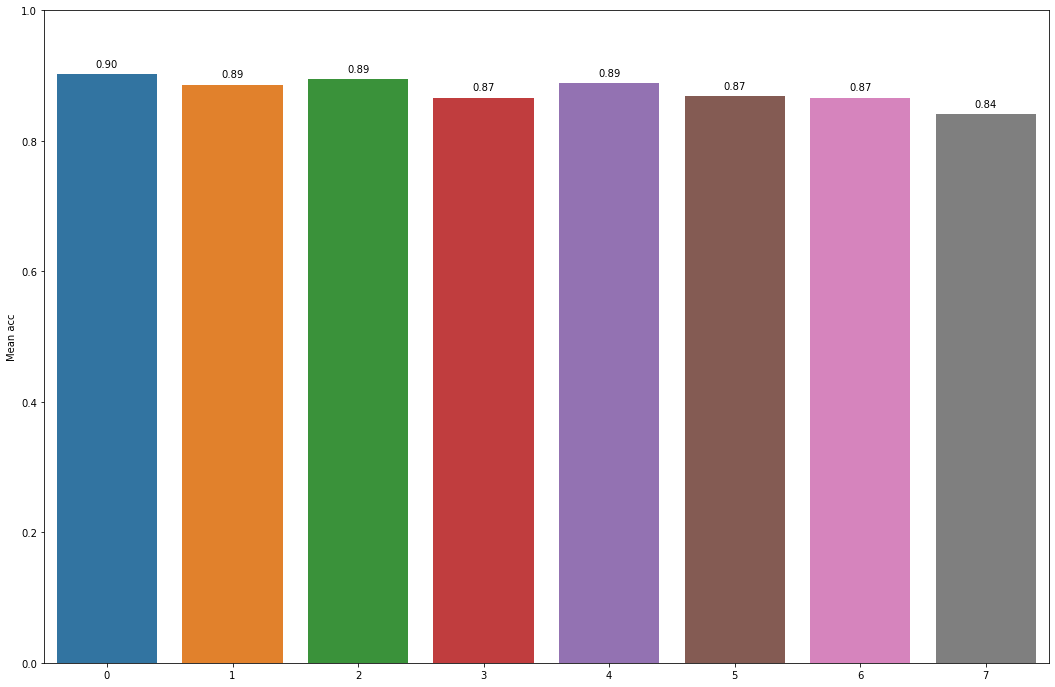

In [151]:
# Wykres średniej precyzji dla każdego z modeli
plt.figure(figsize=(18,12))
ax = sns.barplot(data=model_data, x=model_data.index, y='Mean acc') 
ax.set_ylim(0,1)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# Klasyfikator KNN
## 1. Defniowanie parametrów modelu

In [164]:
#parametry - ilosc sąsiadów
parameters = {'n_neighbors':list(range(2,20,1))}
model = KNeighborsClassifier()

In [165]:
#Przeszukiwanie przestrzeni parametrów za pomocą metody grid search
clf = GridSearchCV(model, parameters)
clf.fit(X_val,np.ravel(y_val))
print(f"Najlepsza wartość n: {clf.best_params_}")

Najlepsza wartość n: {'n_neighbors': 3}


[[2, 0.9502525252525252], [3, 0.9558080808080808], [4, 0.954040404040404], [5, 0.9542929292929293], [6, 0.9497474747474748], [7, 0.951010101010101], [8, 0.9487373737373738], [9, 0.9497474747474748], [10, 0.9462121212121212], [11, 0.9434343434343434], [12, 0.9401515151515152], [13, 0.9383838383838384], [14, 0.9378787878787879], [15, 0.9345959595959596], [16, 0.9345959595959596], [17, 0.9315656565656566], [18, 0.9303030303030303], [19, 0.929040404040404]]


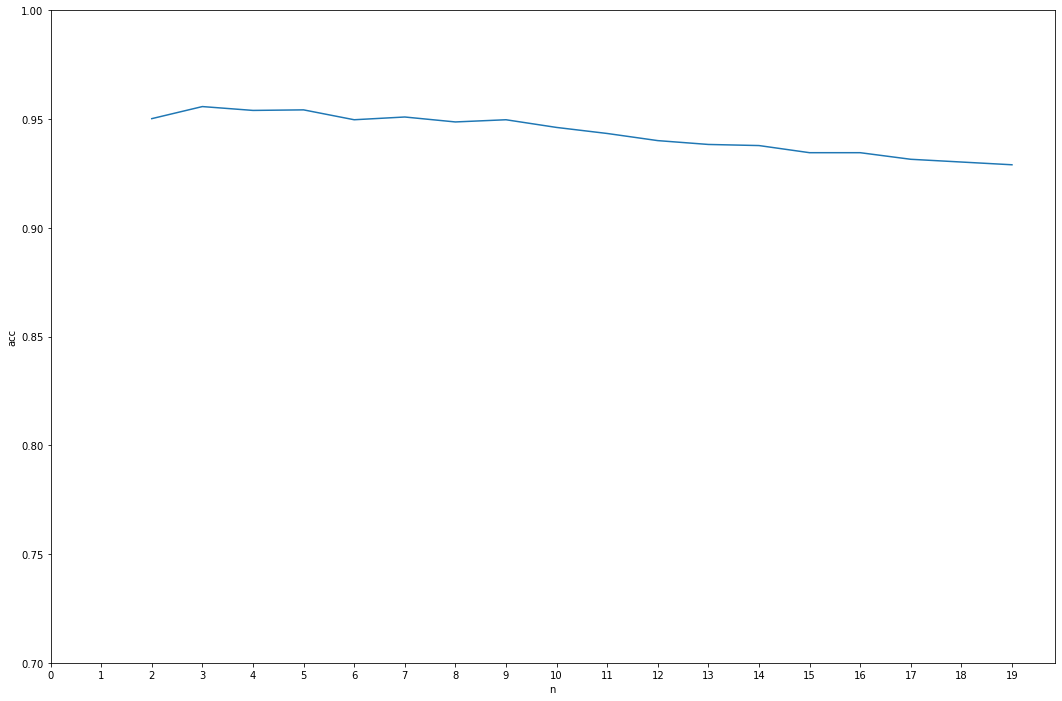

In [172]:
#tworzenie predefiniowanego zbioru treningowego na potrzeby wykresu
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.22, random_state=12)
n_acc = []
for n in parameters['n_neighbors']:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,np.ravel(y_train))
    accuracy = knn.score(X_test, np.ravel(y_test)) 
    n_acc.append([n, accuracy])
print(n_acc)    
    
n_acc =pd.DataFrame(n_acc, columns=["n","acc"])    
plt.figure(figsize=(18,12))
ax = sns.lineplot(data=n_acc, x=n_acc["n"],y=n_acc["acc"]) 
ax.set_ylim(0.7,1)
ax.set_xticks(np.arange(0,20,1))

    



In [167]:
#Testowanie najlepszego modelu za pomocą walidacji krzyżowej
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y): 
    knn = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'])
    knn.fit(X.iloc[train_index],np.ravel(y.iloc[train_index]))
    accuracy = knn.score(X.iloc[test_index], np.ravel(y.iloc[test_index])) 
    print(f"Dokładności {accuracy}")

Dokładności 0.9558333333333333
Dokładności 0.9575
Dokładności 0.9561111111111111
Dokładności 0.9616666666666667
Dokładności 0.9533333333333334
